# Importing Libraries

In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec, FastText
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, Bidirectional, LSTM, GRU


In [2]:
!pip install gensim

In [3]:
!pip install openpyxl

In [4]:
# Load and Preprocess Data
data = pd.read_excel('/kaggle/input/urdu-dataset1/Proposed Dataset.xlsx')
data.dropna(inplace=True)
data.head()

,sentence,target,sents
0,اس کا تھمب نیل ویگن پورن جیسا لگتا ہے۔,0,اس کا تھمب نیل ویگن پورن جیسا لگتا
1,اس کے بال بہت اچھے ہیں اوہ ما خدا مجھے اس پر و...,0,اس بال بہت اوہ ما خدا مجھے اس واقعی فخر کاش می...
2,یہ ویڈیو کتنی پرانی ہے کیونکہ میں جانتا ہوں کہ...,0,ویڈیو کتنی پرانی کیونکہ میں جانتا آپ کسی بیکن ...
3,اگر وہ مکمل ویگن ہو رہی ہے تو وہ جانتی ہے کہ و...,0,اگر وہ مکمل ویگن وہ جانتی وہ ایسی مصنوعات استع...
4,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...,0,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...


In [5]:
# Tokenization
tokenizer = Tokenizer()
#data['sents'] = data['no stop'].apply(lambda x: str(x).split())
tokenizer.fit_on_texts(data['sents'])
sequences = tokenizer.texts_to_sequences(data['sents'])

In [6]:
# Pad Sequences
vocab_size = len(tokenizer.word_index) + 1
maxlen = max(data['sents'].apply(len))
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [7]:
word2vec = Word2Vec(data['sents'], vector_size=100, window=3, min_count=1, workers=4, epochs=100)

In [8]:
word2vec_embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    word2vec_embedding_matrix[i] = word2vec.wv[word] if word in word2vec.wv else np.zeros(100)

In [9]:
test_data=pd.read_csv('/kaggle/input/urdu-dataset1/train.csv')
test_data.dropna(inplace=True)
test_data.head()

,id,tweet,target
0,1024,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1
1,1919,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0
2,102,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0
3,679,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0
4,2093,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0


In [10]:
stopwords = ['آئی', 'آئے', 'آج', 'آخر', 'آخرکبر', 'آدهی', 'آًب', 'آٹھ', 'آیب', 'اة', 'اخبزت', 'اختتبم',  'ادھر', 'ارد', 'اردگرد', 'ارکبى', 'اش', 'اضتعوبل', 'اضتعوبلات', 'اضطرذ', 'اضکب', 'اضکی',  'اضکے', 'اطراف', 'اغیب', 'افراد', 'الگ', 'اور', 'اوًچب', 'اوًچبئی', 'اوًچی', 'اوًچے', 'اى',  'اً', 'اًذر', 'اًہیں', 'اٹھبًب', 'اپٌب', 'اپٌے', 'اچھب', 'اچھی', 'اچھے', 'اکثر', 'اکٹھب',  'اکٹھی', 'اکٹھے', 'اکیلا', 'اکیلی', 'اکیلے', 'اگرچہ', 'اہن', 'ایطے', 'ایک', 'ب', 'ت', 'تبزٍ',  'تت', 'تر', 'ترتیت', 'تریي', 'تعذاد', 'تن', 'تو', 'توبم', 'توہی', 'توہیں', 'تٌہب', 'تک',  'تھب', 'تھوڑا', 'تھوڑی', 'تھوڑے', 'تھی', 'تھے', 'تیي', 'ثب', 'ثبئیں', 'ثبترتیت', 'ثبری', 'ثبرے',  'ثبعث', 'ثبلا', 'ثبلترتیت', 'ثبہر', 'ثدبئے', 'ثرآں', 'ثراں', 'ثرش', 'ثعذ', 'ثغیر', 'ثلٌذ',  'ثلٌذوثبلا', 'ثلکہ', 'ثي', 'ثٌب', 'ثٌبرہب', 'ثٌبرہی', 'ثٌبرہے', 'ثٌبًب', 'ثٌذ', 'ثٌذکرو',  'ثٌذکرًب', 'ثٌذی', 'ثڑا', 'ثڑوں', 'ثڑی', 'ثڑے', 'ثھر', 'ثھرا', 'ثھراہوا', 'ثھرپور', 'ثھی',  'ثہت', 'ثہتر', 'ثہتری', 'ثہتریي', 'ثیچ', 'ج', 'خب', 'خبرہب', 'خبرہی', 'خبرہے', 'خبهوظ',  'خبًب', 'خبًتب', 'خبًتی', 'خبًتے', 'خبًٌب', 'خت', 'ختن', 'خجکہ', 'خص', 'خططرذ', 'خلذی',  'خو', 'خواى', 'خوًہی', 'خوکہ', 'خٌبة', 'خگہ', 'خگہوں', 'خگہیں', 'خیطب', 'خیطبکہ', 'در',  'درخبت', 'درخہ', 'درخے', 'درزقیقت', 'درضت', 'دش', 'دفعہ', 'دلچطپ', 'دلچطپی', 'دلچطپیبں',  'دو', 'دور', 'دوراى', 'دوضرا', 'دوضروں', 'دوضری', 'دوضرے', 'دوًوں', 'دکھبئیں', 'دکھبتب',  'دکھبتی', 'دکھبتے', 'دکھبو', 'دکھبًب', 'دکھبیب', 'دی', 'دیب', 'دیتب', 'دیتی', 'دیتے', 'دیر',  'دیٌب', 'دیکھو', 'دیکھٌب', 'دیکھی', 'دیکھیں', 'دے', 'ر', 'راضتوں', 'راضتہ', 'راضتے', 'رریعہ',  'رریعے', 'رکي', 'رکھ', 'رکھب', 'رکھتب', 'رکھتبہوں', 'رکھتی', 'رکھتے', 'رکھی', 'رکھے', 'رہب',  'رہی', 'رہے', 'ز', 'زبصل', 'زبضر', 'زبل', 'زبلات', 'زبلیہ', 'زصوں', 'زصہ', 'زصے', 'زقبئق',  'زقیتیں', 'زقیقت', 'زکن', 'زکویہ', 'زیبدٍ', 'صبف', 'صسیر', 'صفر', 'صورت', 'صورتسبل', 'صورتوں',  'صورتیں', 'ض', 'ضبت', 'ضبتھ', 'ضبدٍ', 'ضبرا', 'ضبرے', 'ضبل', 'ضبلوں', 'ضت', 'ضرور', 'ضرورت',  'ضروری', 'ضلطلہ', 'ضوچ', 'ضوچب', 'ضوچتب', 'ضوچتی', 'ضوچتے', 'ضوچو', 'ضوچٌب', 'ضوچی', 'ضوچیں',  'ضکب', 'ضکتب', 'ضکتی', 'ضکتے', 'ضکٌب', 'ضکی', 'ضکے', 'ضیذھب', 'ضیذھی', 'ضیذھے', 'ضیکٌڈ', 'ضے',  'طرف', 'طریق', 'طریقوں', 'طریقہ', 'طریقے', 'طور', 'طورپر', 'ظبہر', 'ع', 'عذد', 'عظین', 'علاقوں',  'علاقہ', 'علاقے', 'علاوٍ', 'عووهی', 'غبیذ', 'غخص', 'غذ', 'غروع', 'غروعبت', 'غے', 'فرد', 'فی', 'ق',  'قجل', 'قجیلہ', 'قطن', 'لئے', 'لا', 'لازهی', 'لو', 'لوجب', 'لوجی', 'لوجے', 'لوسبت', 'لوسہ',  'لوگ', 'لوگوں', 'لڑکپي', 'لگتب', 'لگتی', 'لگتے', 'لگٌب', 'لگی', 'لگیں', 'لگے', 'لی', 'لیب',  'لیٌب', 'لیں', 'لے', 'ه', 'هتعلق', 'هختلف', 'هسترم', 'هسترهہ', 'هسطوش', 'هسیذ', 'هطئلہ',  'هطئلے', 'هطبئل', 'هطتعول', 'هطلق', 'هعلوم', 'هػتول', 'هلا', 'هوکي', 'هوکٌبت', 'هوکٌہ',  'هٌبضت', 'هڑا', 'هڑًب', 'هڑے', 'هکول', 'هگر', 'هہرثبى', 'هیرا', 'هیری', 'هیرے', 'هیں', 'و',  'وار', 'والے', 'وٍ', 'ًئی', 'ًئے', 'ًب', 'ًبپطٌذ', 'ًبگسیر', 'ًطجت', 'ًقطہ', 'ًو', 'ًوخواى',  'ًکبلٌب', 'ًکتہ', 'ًہ', 'ًہیں', 'ًیب', 'ًے', 'ٓ آش', 'ٹھیک', 'پبئے', 'پبش', 'پبًب', 'پبًچ',  'پر', 'پراًب', 'پطٌذ', 'پل', 'پورا', 'پوچھب', 'پوچھتب', 'پوچھتی', 'پوچھتے', 'پوچھو', 'پوچھوں',  'پوچھٌب', 'پوچھیں', 'پچھلا', 'پھر', 'پہلا', 'پہلی', 'پہلےضی', 'پہلےضے', 'پہلےضےہی', 'پیع',  'چبر', 'چبہب', 'چبہٌب', 'چبہے', 'چلا', 'چلو', 'چلیں', 'چلے', 'چکب', 'چکی', 'چکیں', 'چکے',  'چھوٹب', 'چھوٹوں', 'چھوٹی', 'چھوٹے', 'چھہ', 'چیسیں', 'ڈھوًڈا', 'ڈھوًڈلیب', 'ڈھوًڈو', 'ڈھوًڈًب',  'ڈھوًڈی', 'ڈھوًڈیں', 'ک', 'کئی', 'کئے', 'کب', 'کبفی', 'کبم', 'کت', 'کجھی', 'کرا', 'کرتب',  'کرتبہوں', 'کرتی', 'کرتے', 'کرتےہو', 'کررہب', 'کررہی', 'کررہے', 'کرو', 'کرًب', 'کریں', 'کرے',  'کطی', 'کل', 'کن', 'کوئی', 'کوتر', 'کورا', 'کوروں', 'کورٍ', 'کورے', 'کوطي', 'کوى', 'کوًطب',  'کوًطی', 'کوًطے', 'کھولا', 'کھولو', 'کھولٌب', 'کھولی', 'کھولیں', 'کھولے', 'کہ', 'کہب', 'کہتب',  'کہتی', 'کہتے', 'کہو', 'کہوں', 'کہٌب', 'کہی', 'کہیں', 'کہے', 'کی', 'کیب', 'کیطب', 'کیطرف',  'کیطے', 'کیلئے', 'کیوًکہ', 'کیوں', 'کیے', 'کے', 'کےثعذ', 'کےرریعے', 'گئی', 'گئے', 'گب',  'گرد', 'گروٍ', 'گروپ', 'گروہوں', 'گٌتی', 'گی', 'گیب', 'گے', 'ہر', 'ہن', 'ہو', 'ہوئی', 'ہوئے',  'ہوا', 'ہوبرا', 'ہوبری', 'ہوبرے', 'ہوتب', 'ہوتی', 'ہوتے', 'ہورہب', 'ہورہی', 'ہورہے', 'ہوضکتب',  'ہوضکتی', 'ہوضکتے', 'ہوًب', 'ہوًی', 'ہوًے', 'ہوچکب', 'ہوچکی', 'ہوچکے', 'ہوگئی', 'ہوگئے',  'ہوگیب', 'ہوں', 'ہی', 'ہیں', 'ہے', 'ی', 'یقیٌی', 'یہ', 'یہبں']

In [11]:
test_data['no stop']=test_data['tweet'].apply(lambda x:[word for word in str(x).split() if word not in stopwords])

In [12]:
test_data

,id,tweet,target,no stop
0,1024,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1,"[قوم, لیے, پرانے, خاندانی, نمک, حرام]"
1,1919,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0,"[بھی, ان, خنزیروں, کو, بغض, نواز, میں, سپورٹ, ..."
2,102,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0,"[پاکستان, قبضے, میں, اسرائیلی, پائلٹ, ہے۔]"
3,679,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0,"[نواز, شریف, کا, نواسہ, مستقبل, کا, وزیر, اعظم]"
4,2093,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0,"[صرف, ٹویٹر, پہ, بکواس, کرنا, آسان]"
...,...,...,...,...
2395,2764,ہاہاہا میرا سالہ اپنی باجی کی پدی صاف کر رہا ...,1,"[ہاہاہا, میرا, سالہ, اپنی, باجی, پدی, صاف, کر,..."
2396,1332,مادر چود کشمیر بیچنے والوں کے بھڑوے بھروے عوا...,1,"[مادر, چود, کشمیر, بیچنے, والوں, بھڑوے, بھروے,..."
2397,2154,ایک لفظ نہیں بہت سارے ہیں مثلاً کُتا، بے غیرت...,1,"[لفظ, نہیں, بہت, سارے, مثلاً, کُتا،, بے, غیرت،..."
2398,464,یہ دلّا آدمی رقص کر کر کے آگے کھڑی حجیانیوں کو...,1,"[دلّا, آدمی, رقص, کر, کر, آگے, کھڑی, حجیانیوں,..."


In [13]:
test_tokenizer=Tokenizer()
# test_data['sents']=test_data['tweet'].apply(lambda x:str(x).split())

test_tokenizer.fit_on_texts(test_data['no stop'])
test_sequences=tokenizer.texts_to_sequences(test_data['no stop'])

In [14]:
test_padded_sequences=pad_sequences(test_sequences,maxlen=maxlen,padding='post')

In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['target'], test_size=0.2, random_state=42)

FOR TESTING WITH TRAIN DATASET

In [16]:
xx_test=test_padded_sequences
yy_test=test_data['target']

# CNN

In [17]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Conv1D(filters=32, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 5408, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2704, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,672,713 (36.90 MB)

 Trainable params: 9,672,713 (36.90 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [20]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 92s 45ms/step - accuracy: 0.6611 - loss: 0.5888 - val_accuracy: 0.7999 - val_loss: 0.4056
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.8368 - loss: 0.3467 - val_accuracy: 0.7943 - val_loss: 0.4163
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.8705 - loss: 0.2867 - val_accuracy: 0.7352 - val_loss: 0.5024
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.8546 - loss: 0.2755 - val_accuracy: 0.7456 - val_loss: 0.5937


In [21]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7905 - loss: 0.4249
Test Loss: 0.4176759719848633, Test Accuracy: 0.7932972311973572


In [22]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.7932972415571024
Precision: 0.8436093373809275
Recall: 0.762152449404199
F1 Score: 0.8008148258558156


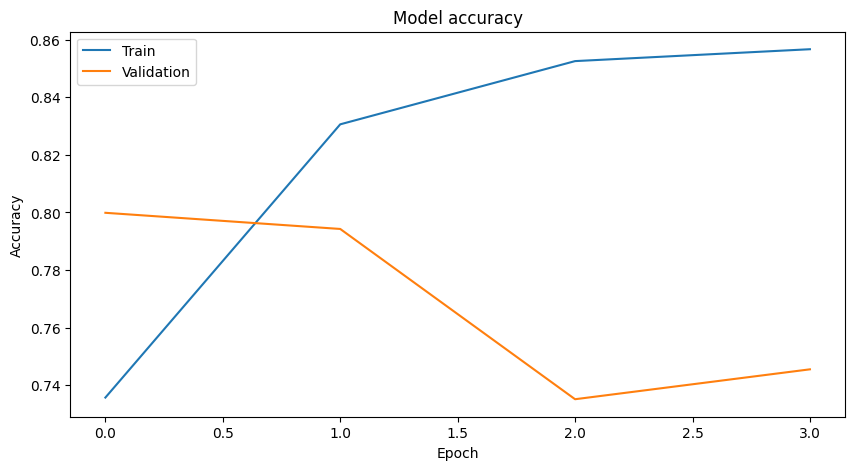

In [23]:
# Assuming 'history' is the variable storing the training history
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

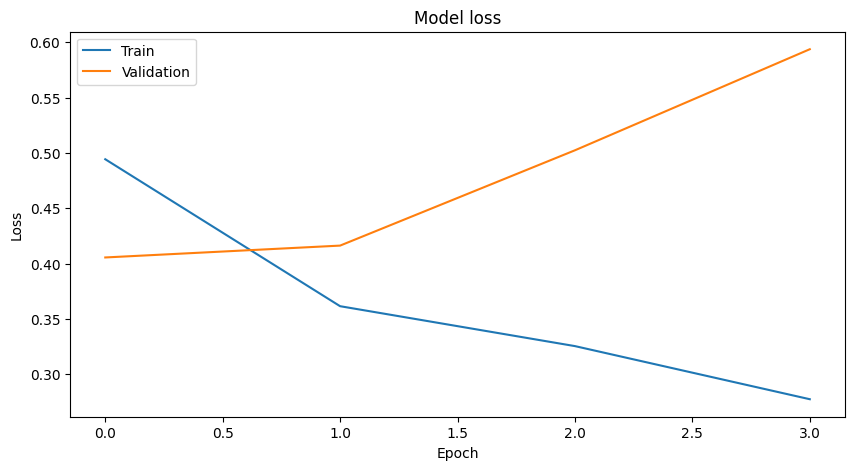

In [24]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

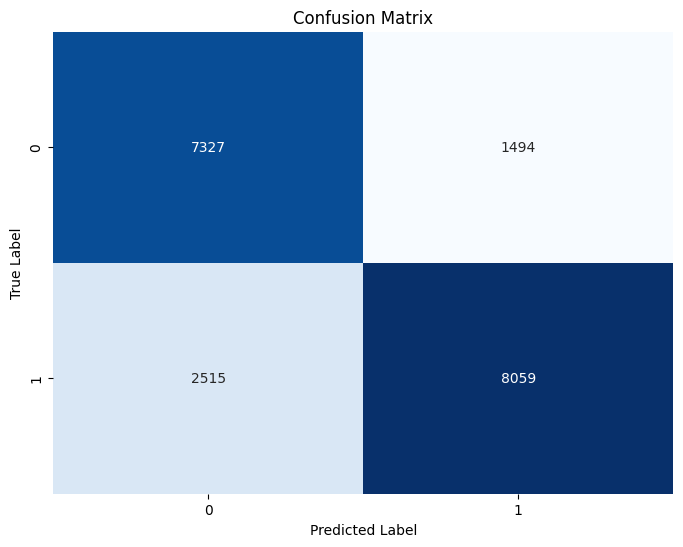

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

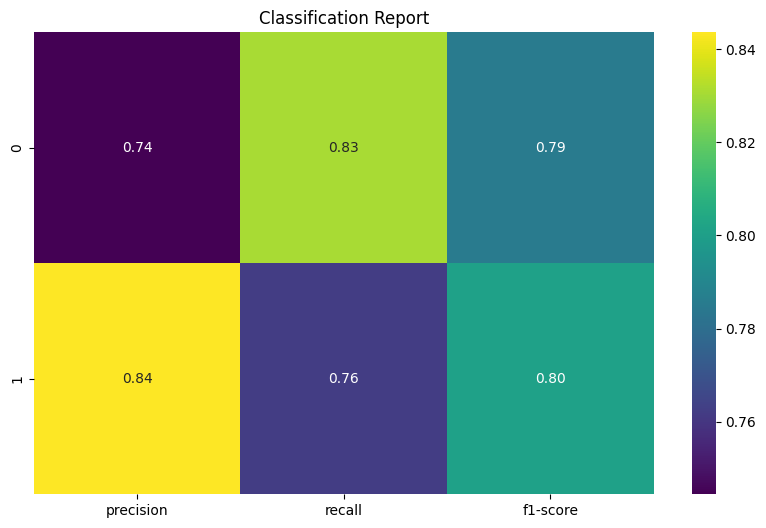

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [27]:
urdu_model.save(f"CNN_model.keras")

Testing with TRAIN DATASET

In [28]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32") # Changed X_test to xx_test for prediction
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8515 - loss: 0.4097
Test Loss: 0.40423819422721863, Test Accuracy: 0.8520833253860474
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8520833333333333
Precision: 0.8156297420333839
Recall: 0.9056444818871103
F1 Score: 0.8582834331337326


# RNN

In [29]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Conv1D(filters=32, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=2),
        SimpleRNN(100),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [30]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5408, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2704, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          13,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,154,621 (15.85 MB)

 Trainable params: 4,154,621 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 581s 298ms/step - accuracy: 0.5340 - loss: 0.6923 - val_accuracy: 0.5378 - val_loss: 0.6909
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 574s 296ms/step - accuracy: 0.5415 - loss: 0.6900 - val_accuracy: 0.5378 - val_loss: 0.6905
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 574s 296ms/step - accuracy: 0.5423 - loss: 0.6896 - val_accuracy: 0.5378 - val_loss: 0.6904


In [32]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 56s 92ms/step - accuracy: 0.5424 - loss: 0.6897
Test Loss: 0.6891798973083496, Test Accuracy: 0.5451920628547668


In [33]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 56s 92ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351996


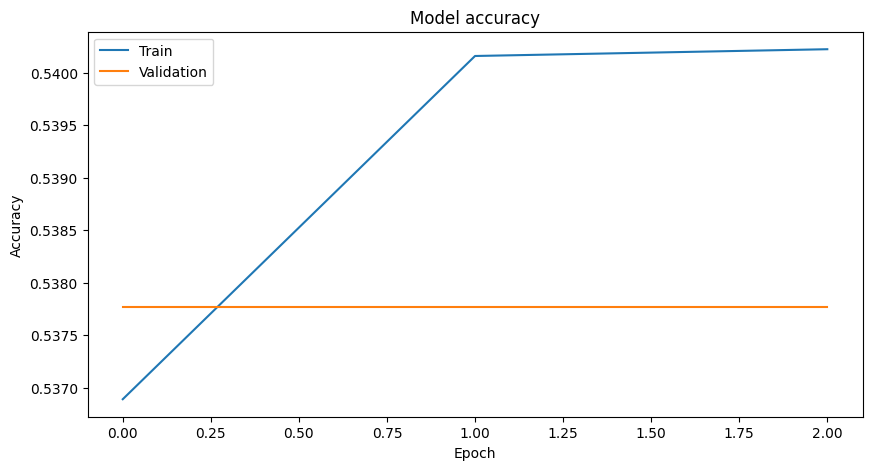

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

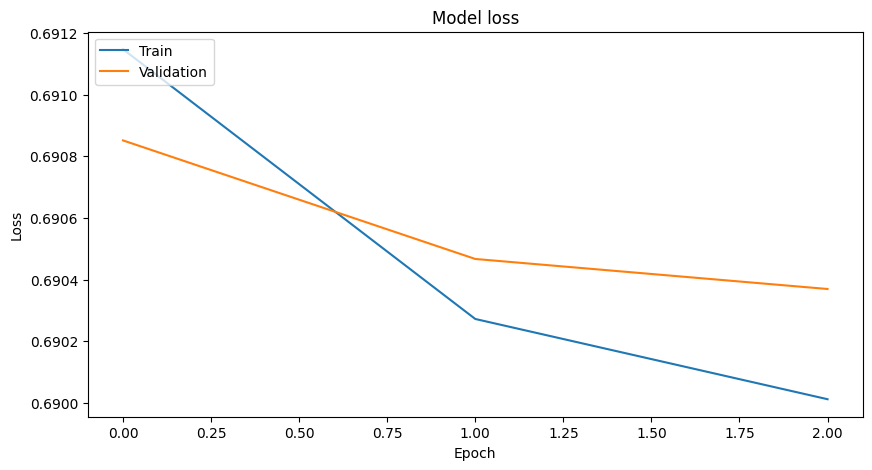

In [35]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

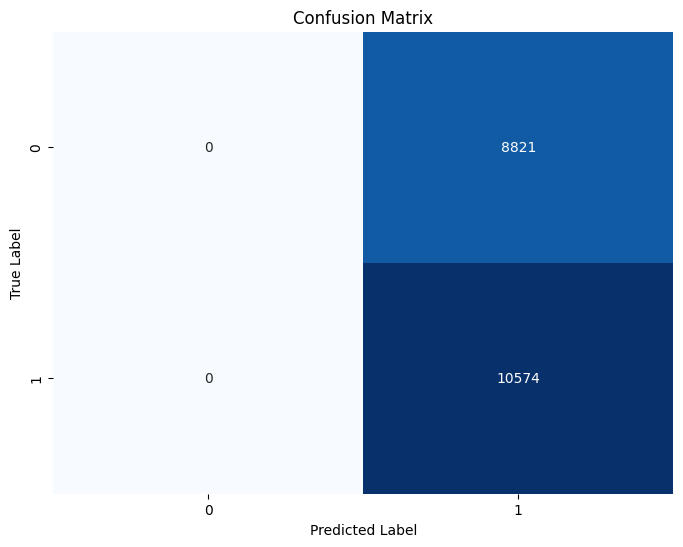

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


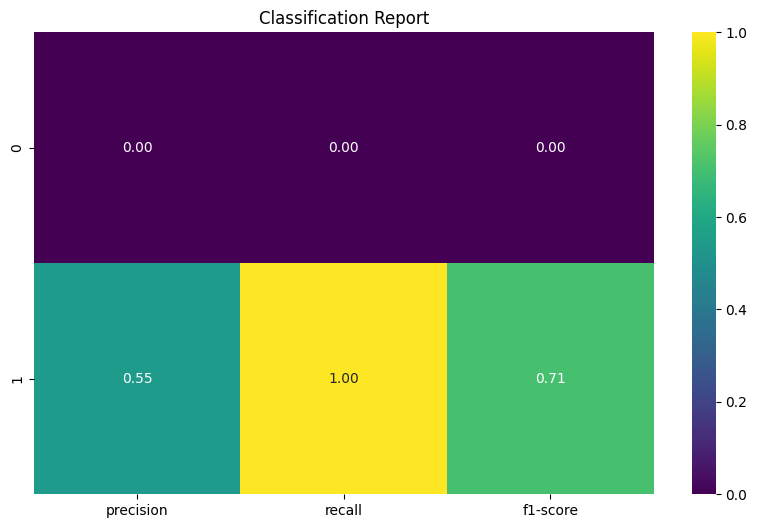

In [37]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [38]:
urdu_model.save(f"RNN_model.keras")

Testing with TRAIN DATASET

In [40]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.4920 - loss: 0.7000
Test Loss: 0.6995061635971069, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-RNN

In [41]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Bidirectional(SimpleRNN(100)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,162,289 (15.88 MB)

 Trainable params: 4,162,289 (15.88 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 851s 439ms/step - accuracy: 0.8399 - loss: 0.3414 - val_accuracy: 0.7978 - val_loss: 0.4034
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 851s 439ms/step - accuracy: 0.8675 - loss: 0.2850 - val_accuracy: 0.7891 - val_loss: 0.4632
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 852s 439ms/step - accuracy: 0.8848 - loss: 0.2430 - val_accuracy: 0.7818 - val_loss: 0.5104


In [90]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 107s 176ms/step - accuracy: 0.7832 - loss: 0.4292
Test Loss: 0.418220579624176, Test Accuracy: 0.7887084484100342


In [91]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 105s 173ms/step
Accuracy: 0.7888631090487239
Precision: 0.8010967562041081
Recall: 0.815112540192926
F1 Score: 0.8080438756855577


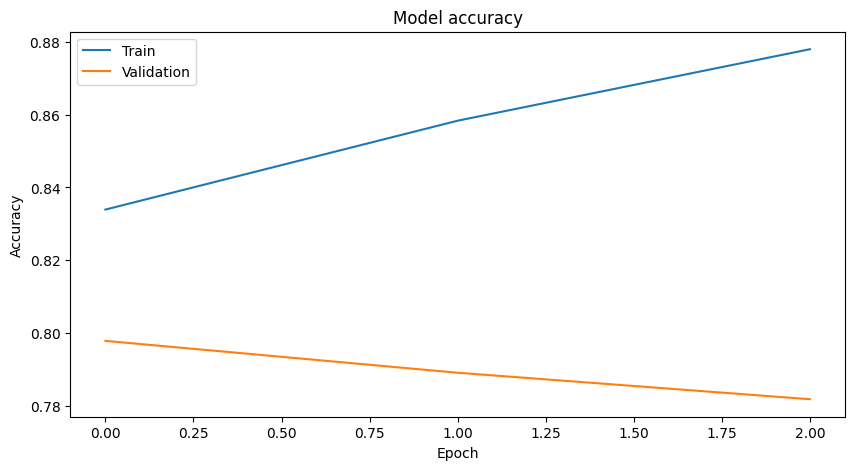

In [92]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

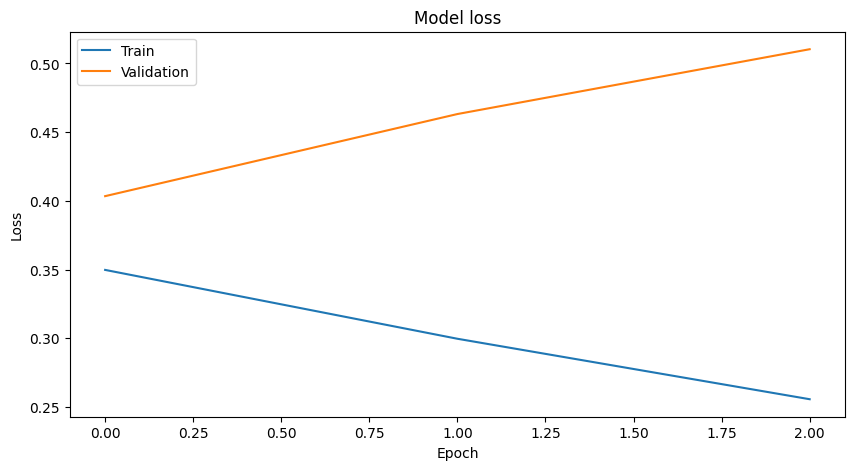

In [93]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

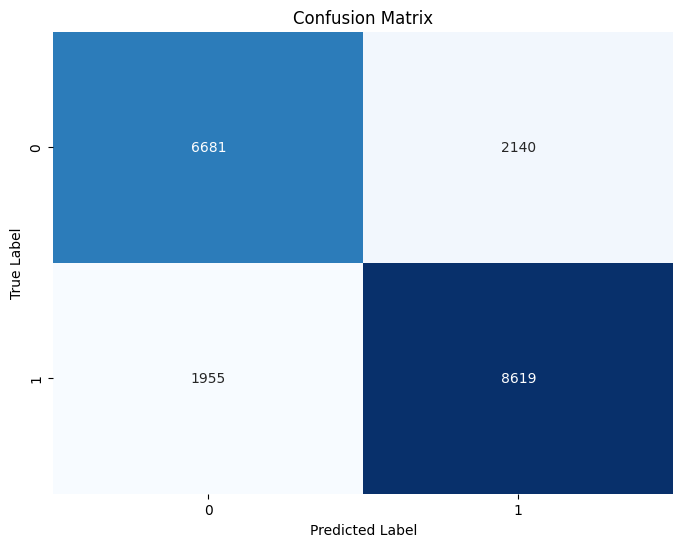

In [94]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

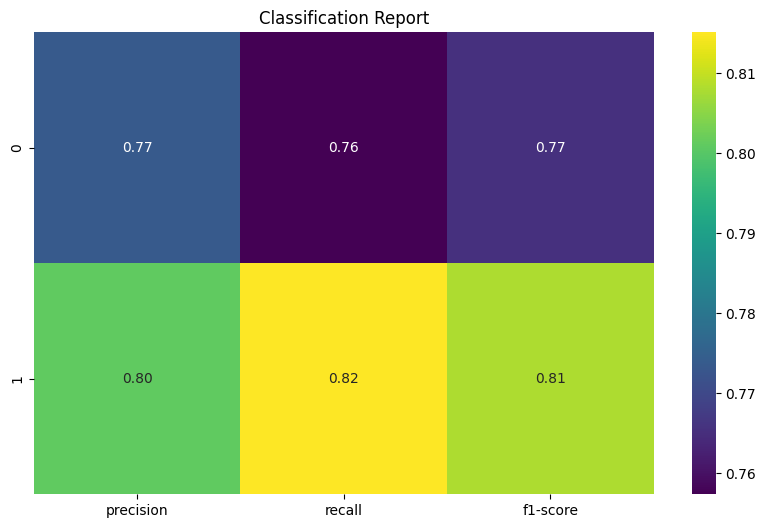

In [95]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [96]:
urdu_model.save(f"Bi-RNN_model.keras")

Testing with TRAIN DATASET

In [97]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - accuracy: 0.8509 - loss: 0.3751
Test Loss: 0.3610440492630005, Test Accuracy: 0.8575000166893005
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step
Accuracy: 0.8579166666666667
Precision: 0.8074127906976745
Recall: 0.9359730412805392
F1 Score: 0.8669527896995709


# LSTM

In [45]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        LSTM(units=64, dropout=0.2, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [46]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,155,625 (15.85 MB)

 Trainable params: 4,155,625 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 461s 235ms/step - accuracy: 0.5362 - loss: 0.6909 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 455s 235ms/step - accuracy: 0.5383 - loss: 0.6902 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 455s 235ms/step - accuracy: 0.5423 - loss: 0.6896 - val_accuracy: 0.5378 - val_loss: 0.6903


In [48]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 57s 95ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891122460365295, Test Accuracy: 0.5451920628547668


In [49]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 55s 91ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351996


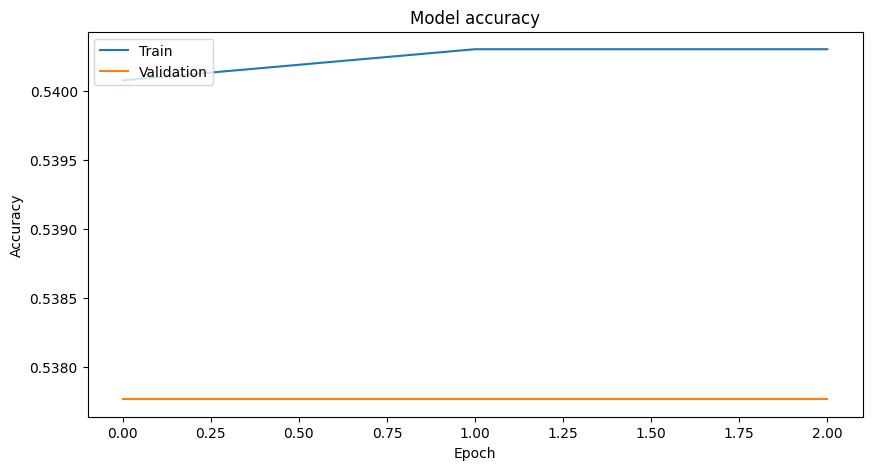

In [50]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

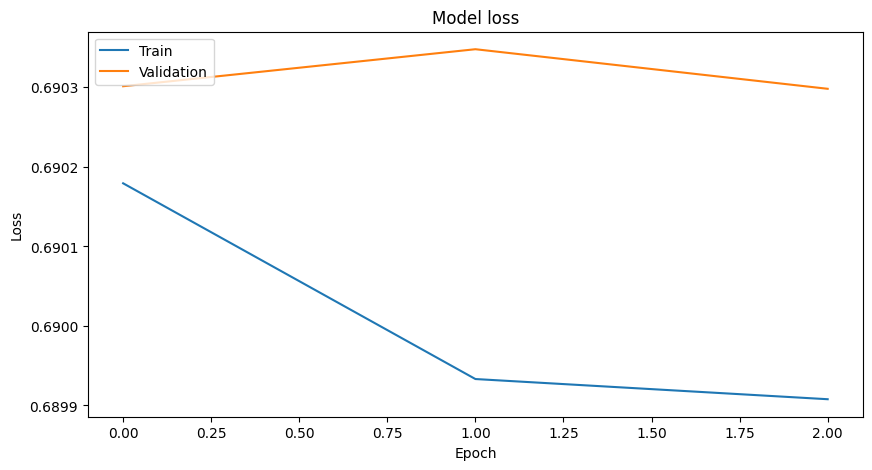

In [51]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

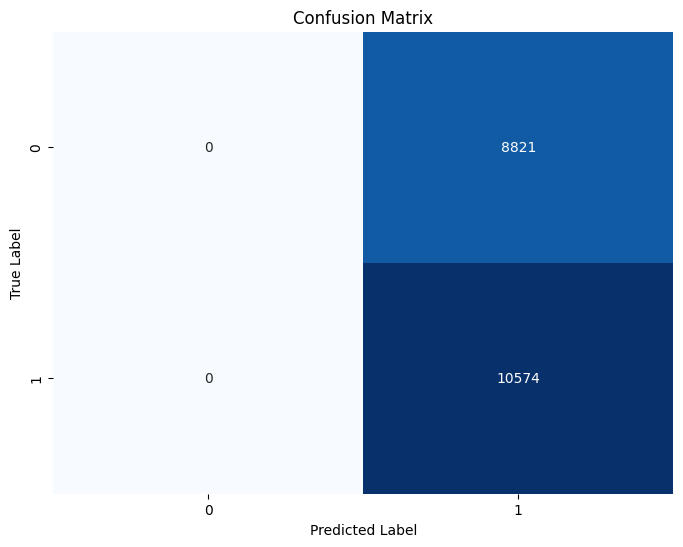

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


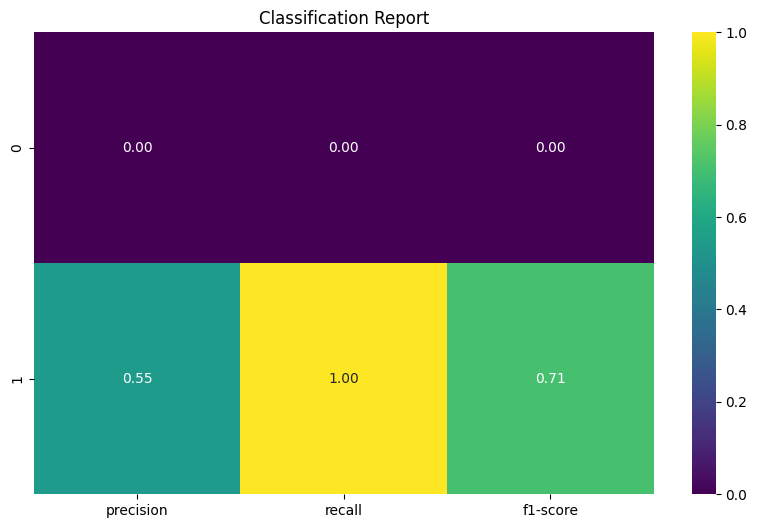

In [53]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [54]:
urdu_model.save(f"LSTM_model.keras")

Testing with TRAIN DATASET

In [55]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.4920 - loss: 0.6976
Test Loss: 0.6972174048423767, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-LSTM

In [56]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [57]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,201,961 (16.03 MB)

 Trainable params: 4,201,961 (16.03 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 904s 465ms/step - accuracy: 0.7296 - loss: 0.5010 - val_accuracy: 0.8021 - val_loss: 0.3938
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 901s 464ms/step - accuracy: 0.8405 - loss: 0.3430 - val_accuracy: 0.7969 - val_loss: 0.4114
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 900s 464ms/step - accuracy: 0.8653 - loss: 0.2892 - val_accuracy: 0.7934 - val_loss: 0.4331
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 900s 464ms/step - accuracy: 0.8822 - loss: 0.2469 - val_accuracy: 0.7834 - val_loss: 0.5105


In [59]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 121s 199ms/step - accuracy: 0.7934 - loss: 0.4126
Test Loss: 0.4055784046649933, Test Accuracy: 0.7961330413818359


In [60]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 120s 197ms/step
Accuracy: 0.7961845836555813
Precision: 0.8377027440579414
Recall: 0.7766219027804048
F1 Score: 0.8060067723413652


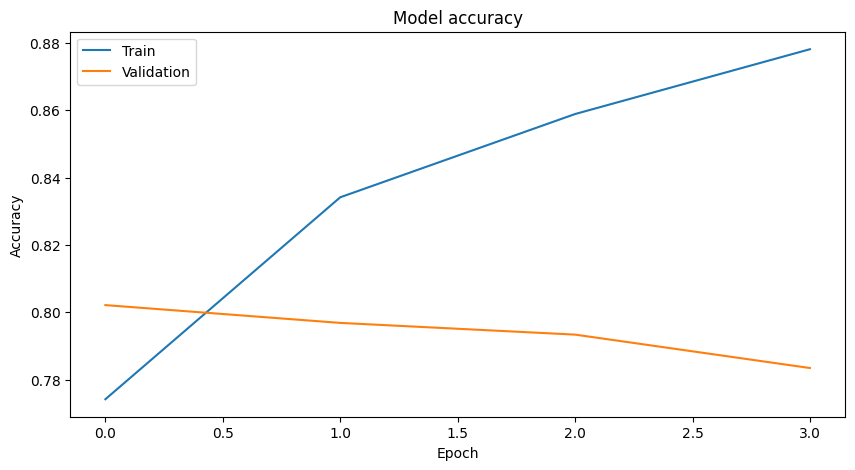

In [61]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

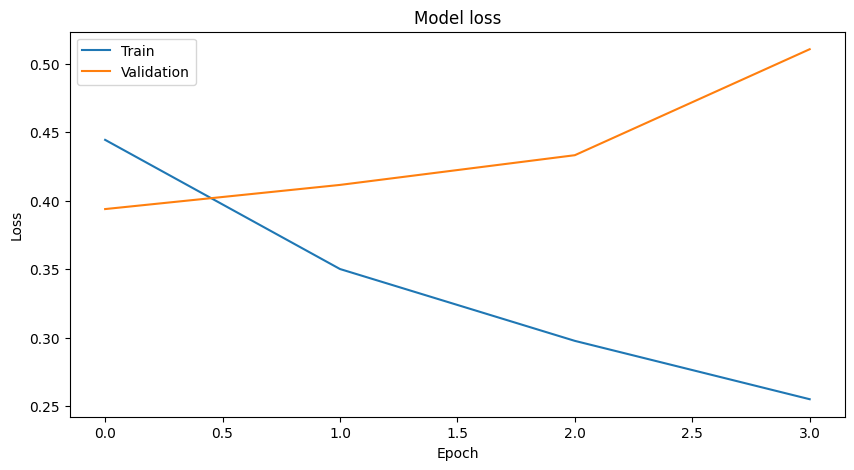

In [62]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

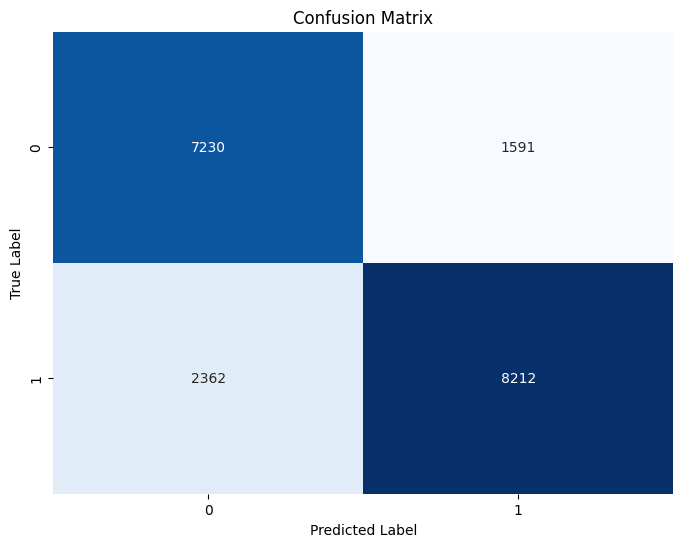

In [63]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

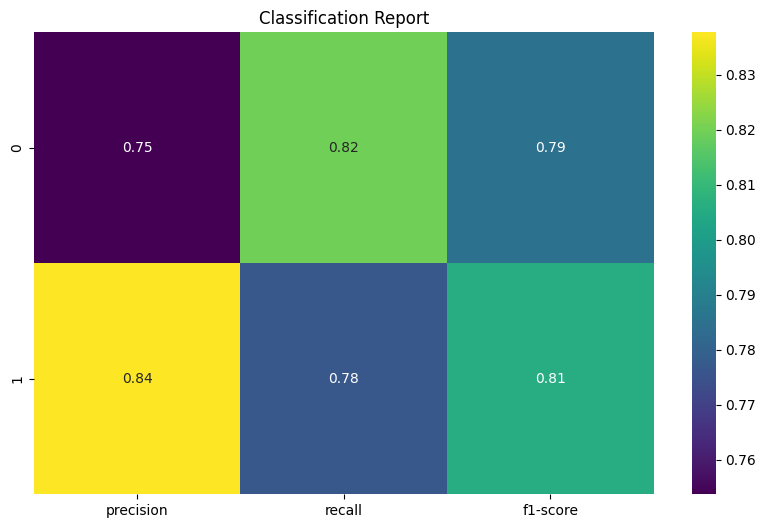

In [64]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [65]:
urdu_model.save(f"Bi-LSTM_model.keras")

Testing with TRAIN DATASET

In [66]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.8460 - loss: 0.4036
Test Loss: 0.3973928987979889, Test Accuracy: 0.8462499976158142
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step
Accuracy: 0.8470833333333333
Precision: 0.8046062407132244
Recall: 0.9123841617523167
F1 Score: 0.8551125148045795


# GRU

In [67]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        GRU(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [68]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          31,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,145,257 (15.81 MB)

 Trainable params: 4,145,257 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 448s 230ms/step - accuracy: 0.5382 - loss: 0.6908 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 445s 229ms/step - accuracy: 0.5411 - loss: 0.6898 - val_accuracy: 0.5378 - val_loss: 0.6904
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 445s 229ms/step - accuracy: 0.5399 - loss: 0.6900 - val_accuracy: 0.5378 - val_loss: 0.6903


In [70]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 53s 88ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891342401504517, Test Accuracy: 0.5451920628547668


In [71]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351996


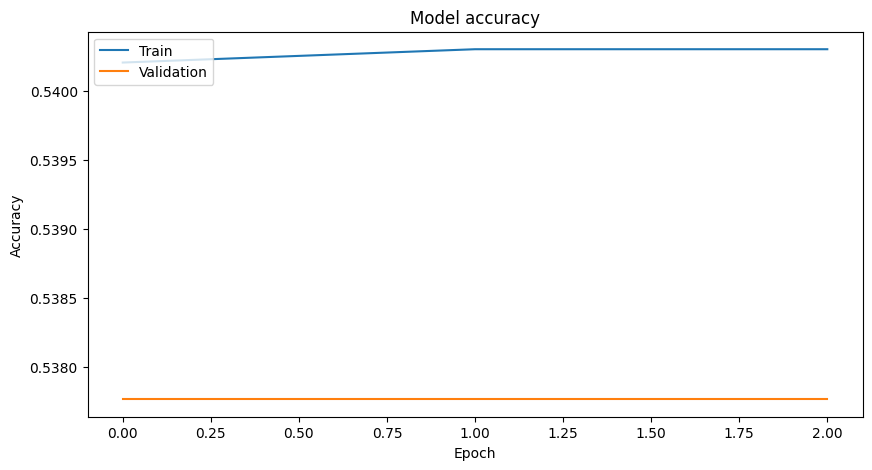

In [72]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

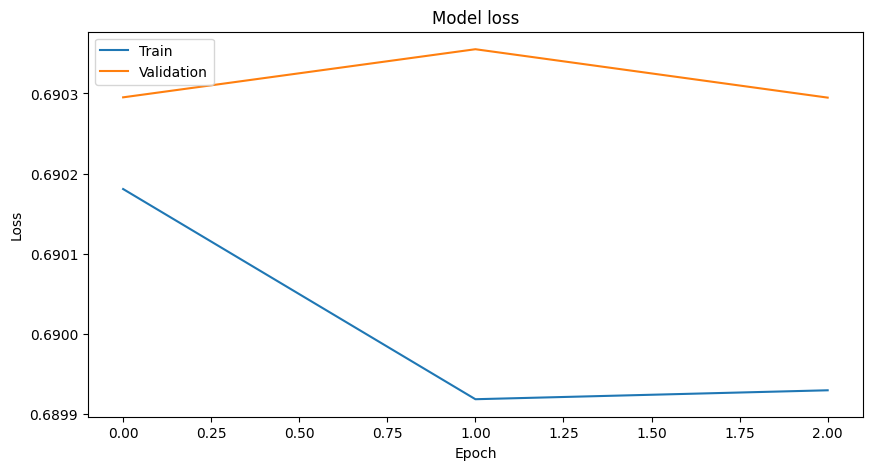

In [73]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

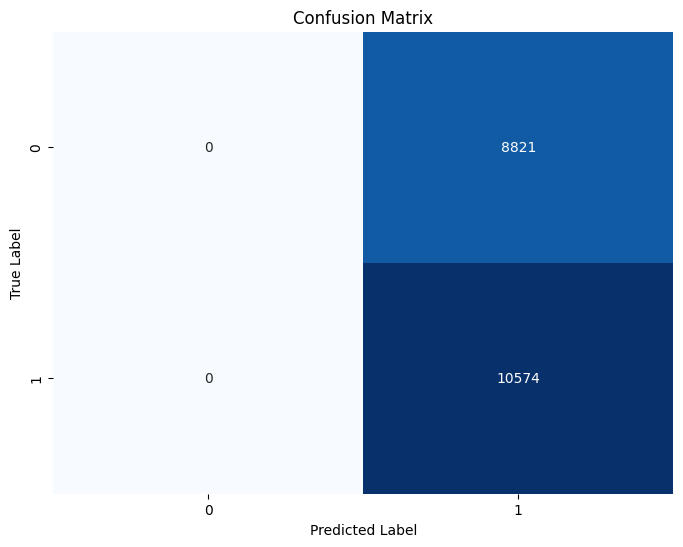

In [74]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


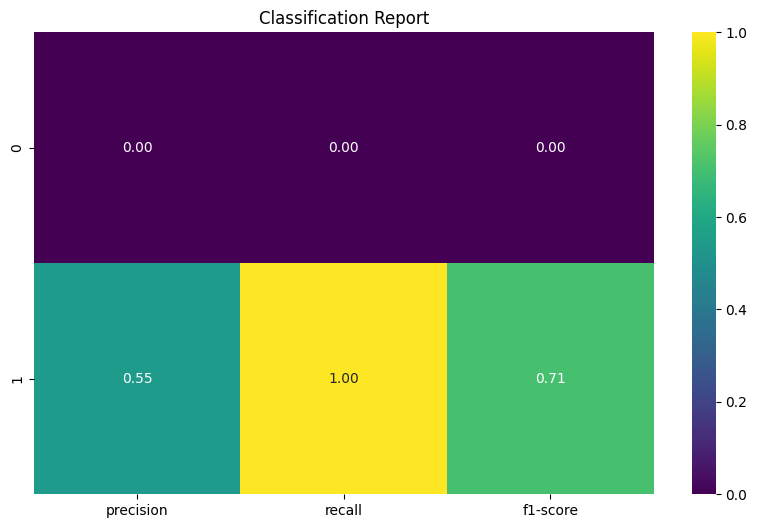

In [75]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [76]:
urdu_model.save(f"GRU_model.keras")

Testing with TRAIN DATASET

In [77]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.4920 - loss: 0.6975
Test Loss: 0.6970483660697937, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-GRU

In [78]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Bidirectional(GRU(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [79]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          63,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,181,225 (15.95 MB)

 Trainable params: 4,181,225 (15.95 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 854s 439ms/step - accuracy: 0.7360 - loss: 0.4926 - val_accuracy: 0.7992 - val_loss: 0.3969
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 851s 439ms/step - accuracy: 0.8414 - loss: 0.3428 - val_accuracy: 0.7969 - val_loss: 0.4048
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 851s 439ms/step - accuracy: 0.8627 - loss: 0.2915 - val_accuracy: 0.7899 - val_loss: 0.4273


In [81]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 107s 176ms/step - accuracy: 0.7897 - loss: 0.4182
Test Loss: 0.41052499413490295, Test Accuracy: 0.7929878830909729


In [82]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 105s 172ms/step
Accuracy: 0.7937097189997422
Precision: 0.8504852298176389
Recall: 0.7542084357858899
F1 Score: 0.799458673750689


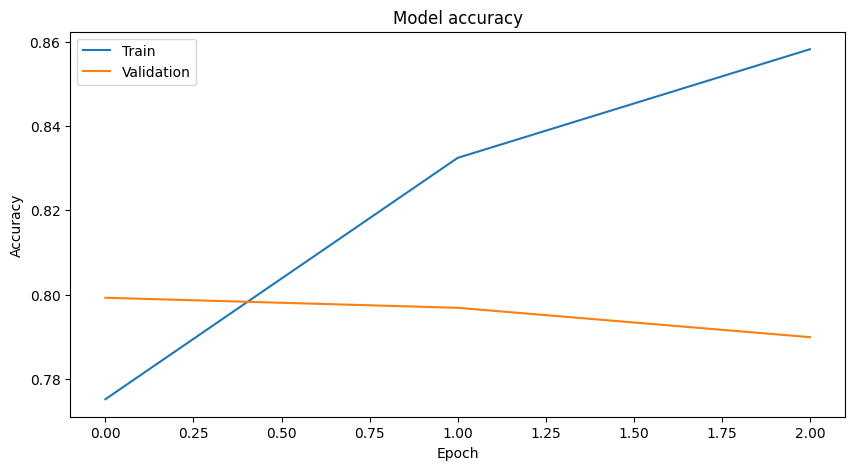

In [83]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

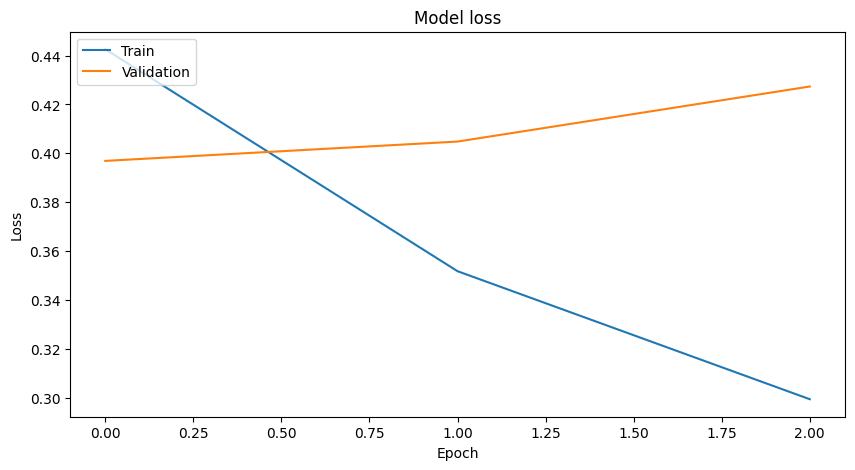

In [84]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

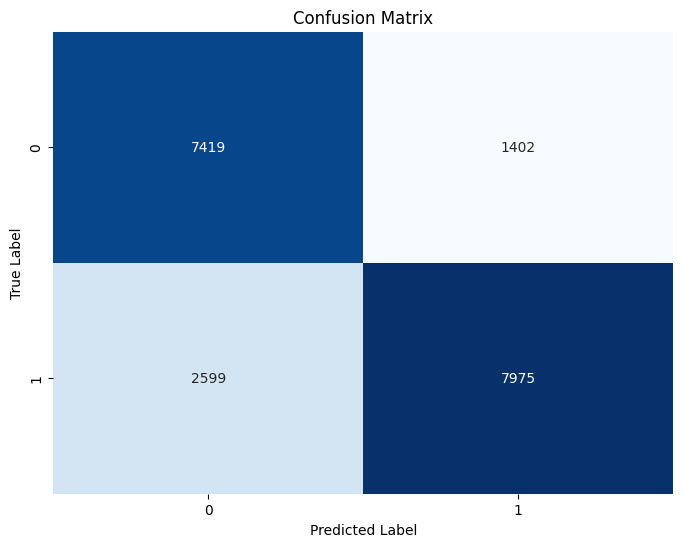

In [85]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

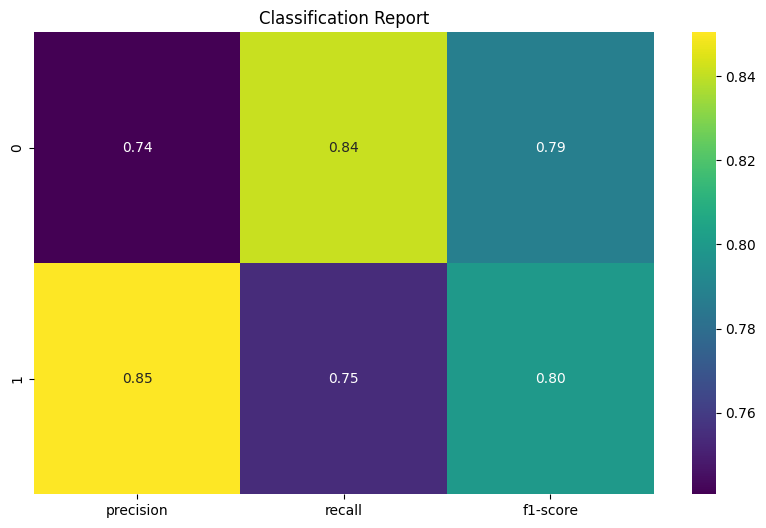

In [86]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [87]:
urdu_model.save(f"Bi-GRU_model.keras")

Testing with TRAIN DATASET

In [88]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - accuracy: 0.8418 - loss: 0.3899
Test Loss: 0.38280782103538513, Test Accuracy: 0.8491666913032532
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step
Accuracy: 0.8475
Precision: 0.8204527712724434
Recall: 0.8854254422914911
F1 Score: 0.8517017828200972
